In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from pandas import Series, DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('rainfall in india 1901-2015.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
df.shape

(4116, 19)

In [4]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [6]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [7]:
df['SUBDIVISION'].nunique()

36



Inference:

    The dataset has 19 features and 4188 entries
    Data is from 36 subdivisions of time span starting from 1901 to 2017
    Data contains monthly, annual and seasonal rainfall data



# Data Preprocessing

Feature Engineering

In [8]:
# Creating a new data frame containing mean value of annual rainfall in different subdivisions
x=pd.DataFrame(df.groupby("SUBDIVISION")['ANNUAL'].mean())
x

,ANNUAL
SUBDIVISION,
ANDAMAN & NICOBAR ISLANDS,2927.439423
ARUNACHAL PRADESH,3418.857143
ASSAM & MEGHALAYA,2580.695652
BIHAR,1197.633913
CHHATTISGARH,1371.728696
COASTAL ANDHRA PRADESH,1052.904348
COASTAL KARNATAKA,3408.409649
EAST MADHYA PRADESH,1205.000000
EAST RAJASTHAN,655.215652


In [9]:
x.shape

(36, 1)

In [10]:
x=x.reset_index() 
x

,SUBDIVISION,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2927.439423
1,ARUNACHAL PRADESH,3418.857143
2,ASSAM & MEGHALAYA,2580.695652
3,BIHAR,1197.633913
4,CHHATTISGARH,1371.728696
5,COASTAL ANDHRA PRADESH,1052.904348
6,COASTAL KARNATAKA,3408.409649
7,EAST MADHYA PRADESH,1205.000000
8,EAST RAJASTHAN,655.215652
9,EAST UTTAR PRADESH,979.213043


In [11]:
# Creating a new dataframe by merging df and x 
df1 = df.merge(x, on='SUBDIVISION', how='left')
df1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_x,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,ANNUAL_y
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423


In [12]:
# Assigning mean value of annual rainfall to dataset as a new column
df['MEAN ANNUAL']=df1['ANNUAL_y']
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423


# Creating a new column as Prediction which predicts 'flood', if annual rainfall is 25% greater than mean of annual rainfall of that subdivision, if 25% lesser than the the mean of annual rainfall of that subdivision, predict "drought" if otherwise 'normal'

In [13]:
df.loc[df['ANNUAL']>=(df['MEAN ANNUAL']*125/100),'Prediction']="Flood"
df.loc[df['ANNUAL']<=(df['MEAN ANNUAL']*75/100),'Prediction']="Drought"
df['Prediction'].fillna('Normal', inplace=True)

In [14]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,2927.439423,Normal
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,2927.439423,Normal
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2927.439423,Normal
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,2927.439423,Normal
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2927.439423,Normal


In [15]:
df['Prediction'].value_counts()

Normal     3296
Flood       419
Drought     401
Name: Prediction, dtype: int64

# Monthly rainfall in india

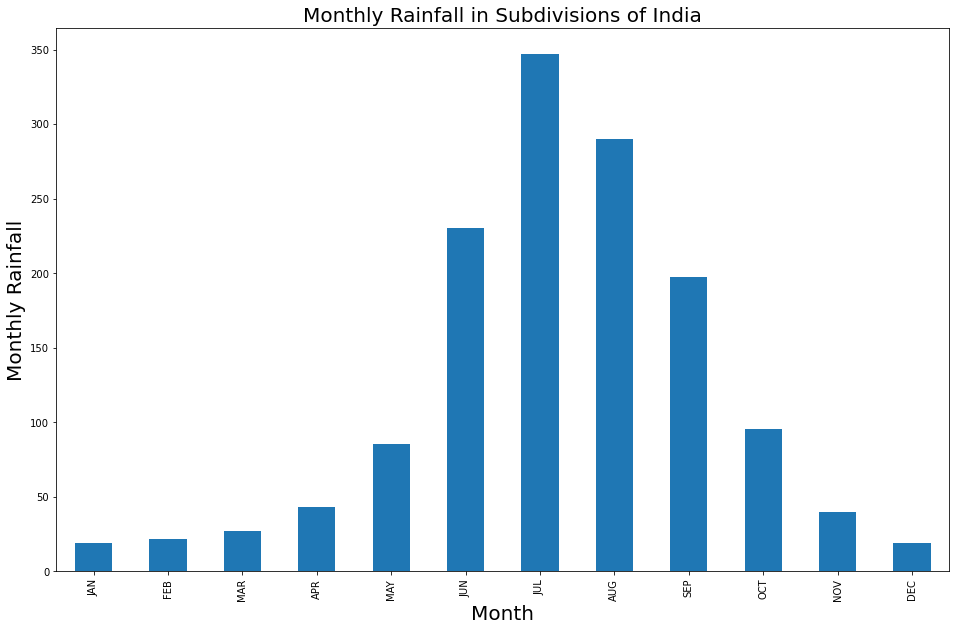

In [18]:
df[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=1, figsize=(16,10))
plt.xlabel('Month',fontsize=20)
plt.ylabel('Monthly Rainfall', fontsize=20)
plt.title('Monthly Rainfall in Subdivisions of India', fontsize=20);

# Annual rainfall from year 1901-2015 in India

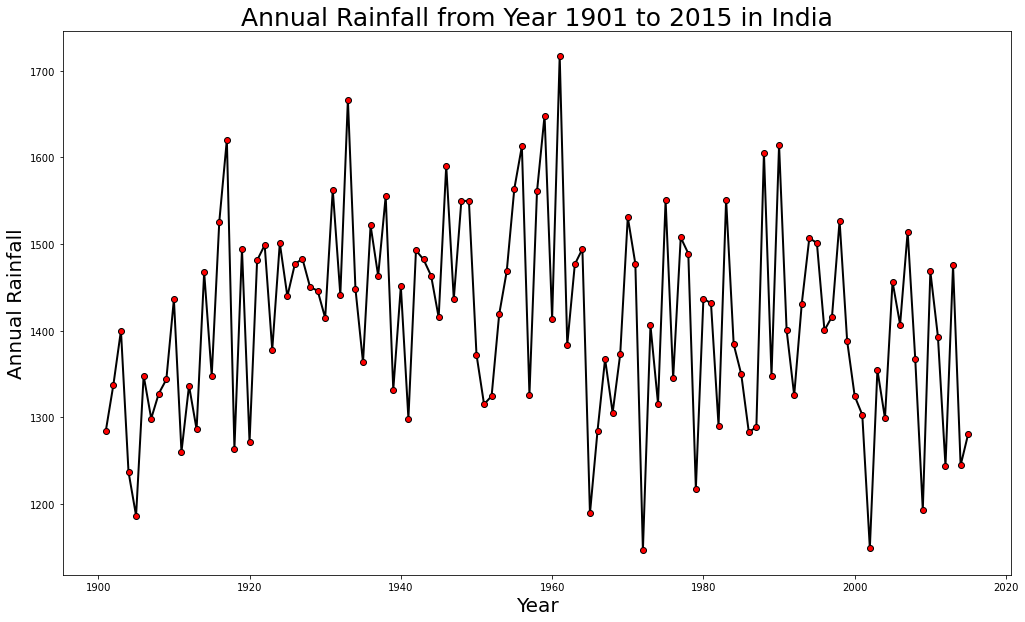

In [22]:
df.groupby("YEAR").mean()['ANNUAL'].plot(color='k',marker='o',markerfacecolor='red',linestyle='-',linewidth=2,figsize=(17,10))
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Annual Rainfall',fontsize=20)
plt.title('Annual Rainfall from Year 1901 to 2015 in India',fontsize=25);

# Quarterly ranilfall in India

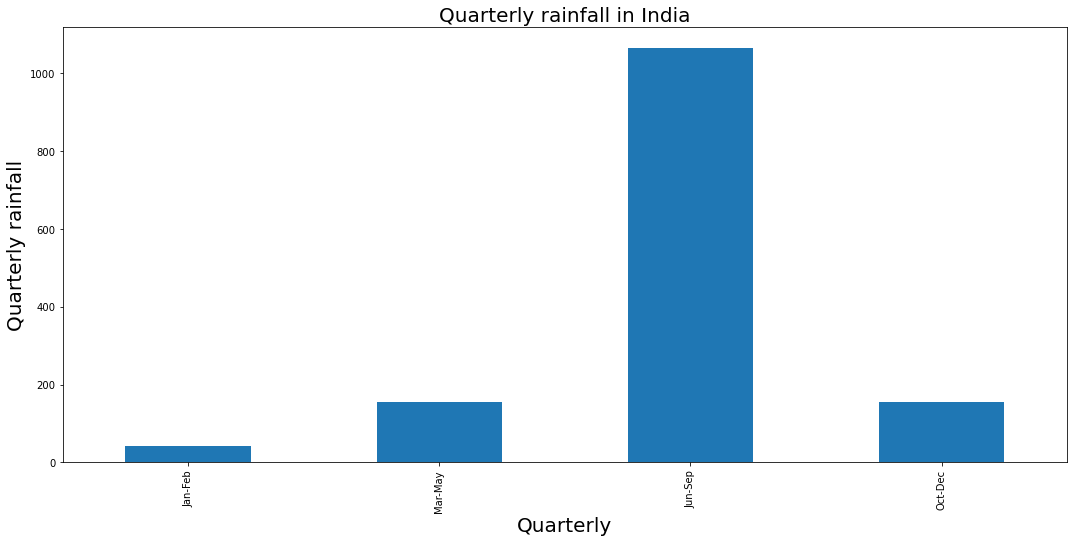

In [23]:
df[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']].mean().plot.bar(width = .5,linewidth = 2,figsize =(18,8))
plt.xlabel('Quarterly',fontsize = 20)
plt.ylabel('Quarterly rainfall',fontsize = 20)
plt.title('Quarterly rainfall in India',fontsize =20);

# Yearly rainfall in Kerala

In [24]:
df_kerala =df[df.SUBDIVISION == 'KERALA']
df_kerala.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MEAN ANNUAL,Prediction
3887,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,...,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1,2925.487826,Normal
3888,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,...,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2,2925.487826,Normal
3889,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,...,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1,2925.487826,Normal
3890,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,...,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3,2925.487826,Normal
3891,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,...,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1,2925.487826,Normal


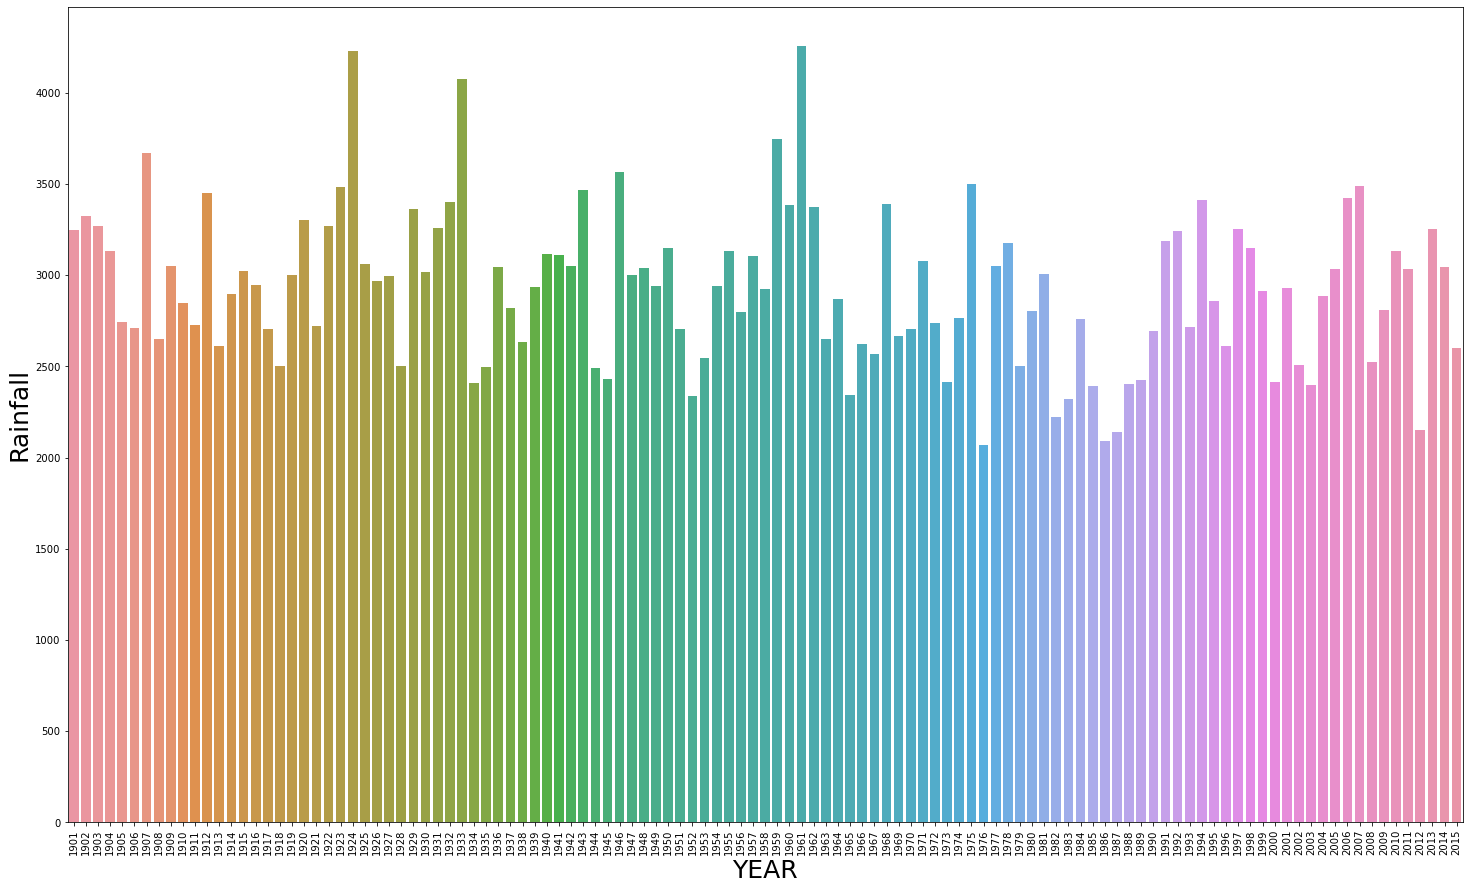

In [26]:
plt.subplots(figsize = (25,15))
plt.xticks(rotation = 90)
sns.barplot('YEAR','ANNUAL',data =df_kerala)
plt.xlabel('YEAR',fontsize = 25)
plt.ylabel('Rainfall',fontsize = 25);